<a href="https://colab.research.google.com/github/Manikanta5112/DP-PyTorch/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another

(
    there can be multiple things as the options
)

## 1. Make  classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make a 1000 samples

n_samples = 1000

# Create circles

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"\n First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

 First 5 samples of y: 
 [1 1 1 1 0]


In [5]:
# Make a dataframe of circle data

import pandas as pd

circles = pd.DataFrame( {
    "X1":X[:,0], # 0th index
    "X2":X[:,1],
    "label":y
}

)

In [6]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


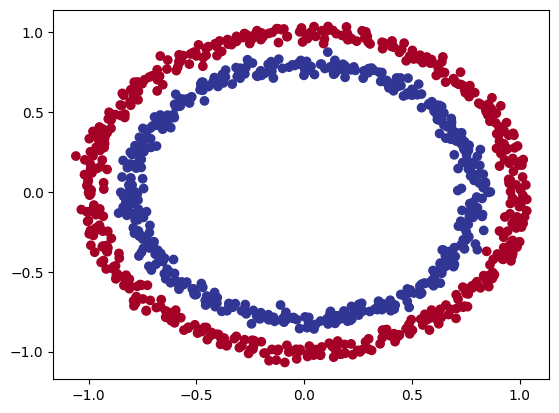

In [7]:
# Visualize, Visualize

import matplotlib.pyplot as plt

plt.scatter(
    x=X[:,0],
    y=X[:,1],
    c = y, # we want to color based on the label,
    cmap = plt.cm.RdYlBu,
)
plt.show()

### 1.1 check input and output shapes

In [8]:
X.shape

(1000, 2)

In [9]:
y.shape

(1000,)

In [10]:
import torch
torch.tensor(X,dtype=torch.float32)

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [11]:
# View the first amples of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes of one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [12]:
X.dtype, type(X)

(dtype('float64'), numpy.ndarray)

In [13]:
X_tensor = torch.from_numpy(X).type(torch.float32)# or X_tensor = torch.tensor(X)

y_tensor = torch.from_numpy(y).type(torch.float32) # y_tensor = torch.tensor(y)


In [14]:
type(X_tensor), X_tensor.dtype, y_tensor.dtype

(torch.Tensor, torch.float32, torch.float32)

In [15]:
# Generic split

# split_per = int(len(X_tensor)*0.8)

# X_train = X_tensor[:split_per]
# y_train = y_tensor[:split_per]

# X_test = X_tensor[split_per:]
# y_test = y_tensor[split_per:]

# len(X_train), len(y_train), len(X_test), len(y_test)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size = 0.2, # 0.2 = 20% of data will be test set & 80% will be train set
                                                    random_state=42)

len(X_train), len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

## 2. Building a model

Let's build a model to classify out blue and red dots.

To do so, we want to:
1. setup device agonistic code so our code will run on an accelettor (GPU) if there is one
2. Construct a model (subclass of torch.nn.Module)
3. Define loss function and optimzer
4. Create a training and test loop


In [17]:
# import PyTorch

import torch

from torch import nn

# Make device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Constructing a model

Now we've setup device agnostic code, let's create a model that:

  1. Sublcasss `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
  2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
  3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
  4. Instantiate an instance of our model class and send it to the target device


In [18]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shapes of our data
    # self.layer1 = nn.Linear(in_features=2, out_features=5) # takes in 2 featues and upscales to 5 featues, usually shape if mulitple of 8 for efficient computing
    # self.layer2 = nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)
    # or
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )
  # 3. define a forward() method that outlines the forward pass
  def forward(self,x):
    #return self.layer2(self.layer1(x)) # x -> layer_1 -> layer_2 -> output
    return two_linear_layers(x)


# 4. Instantiate an instance of our model class and send it to the target device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
device

'cpu'

In [20]:
next(model_0.parameters()).device

device(type='cpu')

In [21]:
# Let's replicate the model above using nn.Sequential()

model_0 = torch.nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

model_0.to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict() # weight tensor and bias tensor for 0th and 1st layer

OrderedDict([('0.weight',
              tensor([[ 0.2744,  0.5537],
                      [ 0.4945, -0.1943],
                      [-0.6018, -0.3881],
                      [ 0.3472,  0.1831],
                      [-0.4796,  0.1008]])),
             ('0.bias', tensor([ 0.2403,  0.4160,  0.0205,  0.4352, -0.2145])),
             ('1.weight',
              tensor([[-0.2440,  0.4276, -0.3282,  0.3342, -0.3699]])),
             ('1.bias', tensor([0.0522]))])

In [23]:
type(X_test)

torch.Tensor

In [24]:
# Make predictions

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"\nLength of test samples: {len(X_test)}, Shape: {y_test.shape}")
print(f"First 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"First 10 labels\n:{y_test[:10]}")

Length of predictions: 200, Shape:torch.Size([200, 1])

Length of test samples: 200, Shape: torch.Size([200])
First 10 predictions: 
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [-0.],
        [0.]], grad_fn=<RoundBackward0>)
First 10 labels
:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimzer

which loss function and optimzer should you use?

Again.... this is problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy and categorical cross entropy (cross entropy).

As a remainder loss function measures how wrong the model is making predictions

And for optimizers, two of the most common and usefull are SGD and Adam, however PyTorch has many built-in options.

**Logits:** In context of deep learning the logits layer means the layer that feeds in to softmax (or other such normalization). The output of the softmax are the probabilities for the classification task and its input is logits layer.


* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()` for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

* For different optimizers see `torch.optim`

In [25]:
# Setup the loss function
# loss_fn = torch.nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = torch.nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2744,  0.5537],
                      [ 0.4945, -0.1943],
                      [-0.6018, -0.3881],
                      [ 0.3472,  0.1831],
                      [-0.4796,  0.1008]])),
             ('0.bias', tensor([ 0.2403,  0.4160,  0.0205,  0.4352, -0.2145])),
             ('1.weight',
              tensor([[-0.2440,  0.4276, -0.3282,  0.3342, -0.3699]])),
             ('1.bias', tensor([0.0522]))])

In [27]:
# Calculate accruacy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_preds):
  correct = torch.eq(y_true,y_preds).sum().item() # torch.eq how many of y_true equal to y_pred
  acc = (correct/len(y_preds)) * 100
  return acc

### 3. Train a model


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [28]:
model_0.eval()

with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5] # logits are raw output of the model
y_logits

tensor([[ 0.1054],
        [ 0.3350],
        [-0.0360],
        [ 0.1435],
        [ 0.6950]])

In [29]:
# we need above output as below

y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5263],
        [0.5830],
        [0.4910],
        [0.5358],
        [0.6671]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5 `y=1` (class 1)
* `y_pred_probs` < 0.5 `y=1` (class 0)


In [31]:
# Find the predicted labels

y_preds = torch.round(y_pred_probs)

# In full (logits -> pred_probs -> pred labels)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 1.])

In [32]:
y_preds,y_preds.squeeze()

(tensor([[1.],
         [1.],
         [0.],
         [1.],
         [1.]]),
 tensor([1., 1., 0., 1., 1.]))

Building a training & testing loop

In [33]:
torch.manual_seed(42)

epochs = 100

epoch_count = []
loss_value = []
test_loss_value = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze() # to get rid of extra 1 dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate loss/accuracy
  # loss = loss_fn(
  #     torch.sigmoid(y_logits), # if our loss_fn is BCELoss expects prediction probabilities as input
  #     y_train,
  # )
  loss = loss_fn(y_logits, # our loss function BCEWithLogitsLoss() excepts raw logits # and BCEWitgLogitsLoss() have numerical stability
                 y_train) #
  acc = accuracy_fn(y_true=y_train,
                    y_preds=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step() (gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    tst_logits = model_0(X_test).squeeze()
    tst_pred = torch.round(
        torch.sigmoid(tst_logits)
    )

    # 2. Calculate test loss/acc
    test_loss = loss_fn(tst_logits,y_test)
    tst_acc = accuracy_fn(
        y_true = y_test,
        y_preds=tst_pred
    )
    if epoch % 10==0:
      epoch_count.append(epoch)
      loss_value.append(loss)
      test_loss_value.append(test_loss)
      print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Train acc: {acc:.2f}% | Test acc: {tst_acc:.2f}%")


Epoch: 0 | Train Loss: 0.73099 | Test Loss: 0.73327 | Train acc: 53.12% | Test acc: 52.00%
Epoch: 10 | Train Loss: 0.71236 | Test Loss: 0.71487 | Train acc: 51.75% | Test acc: 52.50%
Epoch: 20 | Train Loss: 0.70476 | Test Loss: 0.70694 | Train acc: 50.50% | Test acc: 51.00%
Epoch: 30 | Train Loss: 0.70120 | Test Loss: 0.70301 | Train acc: 50.50% | Test acc: 51.00%
Epoch: 40 | Train Loss: 0.69929 | Test Loss: 0.70076 | Train acc: 50.00% | Test acc: 52.00%
Epoch: 50 | Train Loss: 0.69810 | Test Loss: 0.69932 | Train acc: 49.88% | Test acc: 51.00%
Epoch: 60 | Train Loss: 0.69728 | Test Loss: 0.69829 | Train acc: 49.62% | Test acc: 51.00%
Epoch: 70 | Train Loss: 0.69667 | Test Loss: 0.69752 | Train acc: 49.75% | Test acc: 51.50%
Epoch: 80 | Train Loss: 0.69619 | Test Loss: 0.69692 | Train acc: 49.38% | Test acc: 51.00%
Epoch: 90 | Train Loss: 0.69580 | Test Loss: 0.69644 | Train acc: 49.38% | Test acc: 49.00%


Loss Curve

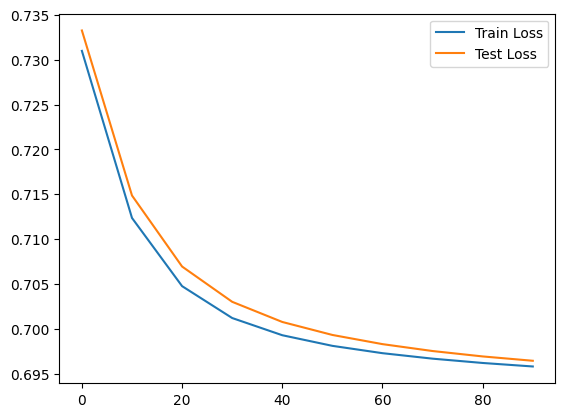

In [34]:
plt.plot(epoch_count,torch.tensor(loss_value).detach().numpy(),label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_value).detach().numpy(), label="Test Loss")
plt.legend()
plt.show()

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [36]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


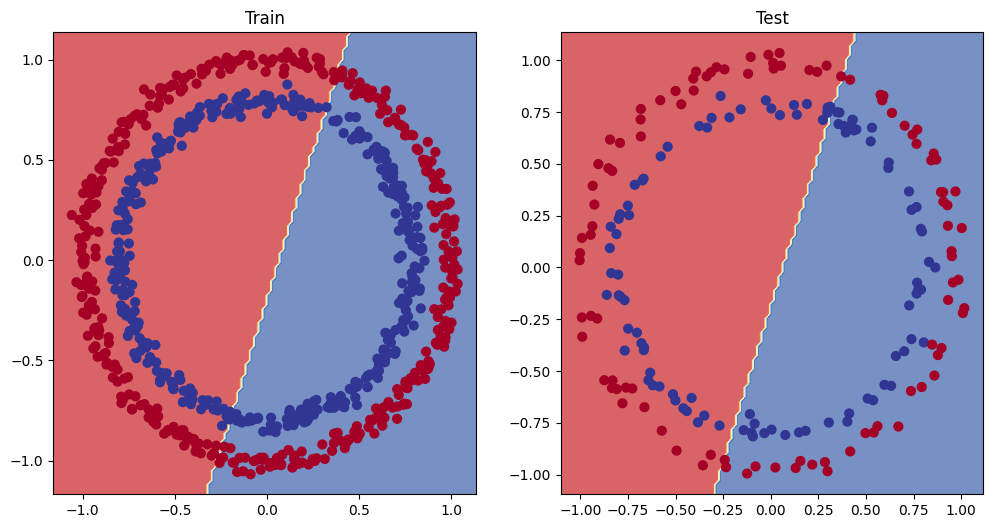

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

##5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer (higher in epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from model's perspective because they deal directly with the model, rather the data.

And because of these options are all values we (as machine learning engineers and data scientist) can change, they referred as **hyperparameters**

In [40]:
class CircleModelV1(nn.Module):
  def __init__(self,):
    super().__init__()
    self.three_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.Linear(in_features=10, out_features=10),
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self,x):
    return self.three_linear_layers(x)

In [42]:
device

'cpu'

In [44]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (three_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [48]:
loss_fn = torch.nn.BCEWithLogitsLoss()

In [49]:
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.0001)

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
epoch_count = []
train_loss_vals = []
test_loss_vals = []

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  pred_probs = torch.sigmoid(y_logits)
  pred_labels = torch.round(pred_probs)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(
      y_true=y_train,
      y_preds = pred_labels
  )

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_logits_test = model_1(X_test).squeeze()
    pred_probs_test = torch.sigmoid(y_logits_test)
    pred_labels_test = torch.round(pred_probs_test)

    tst_loss = loss_fn(y_logits_test, y_test)
    tst_acc = accuracy_fn(
      y_true=y_test,
      y_preds = pred_labels_test
    )

    if epoch %100==0:
      epoch_count.append(epoch)
      train_loss_vals.append(loss)
      test_loss_vals.append(tst_loss)

      print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {tst_loss:.5f} | Train acc: {acc:.2f}% | Test acc: {tst_acc:.2f}%")






Epoch: 0 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 100 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 200 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 300 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 400 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 500 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 600 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 700 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 800 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%
Epoch: 900 | Train Loss: 0.69528 | Test Loss: 0.69257 | Train acc: 51.38% | Test acc: 49.50%


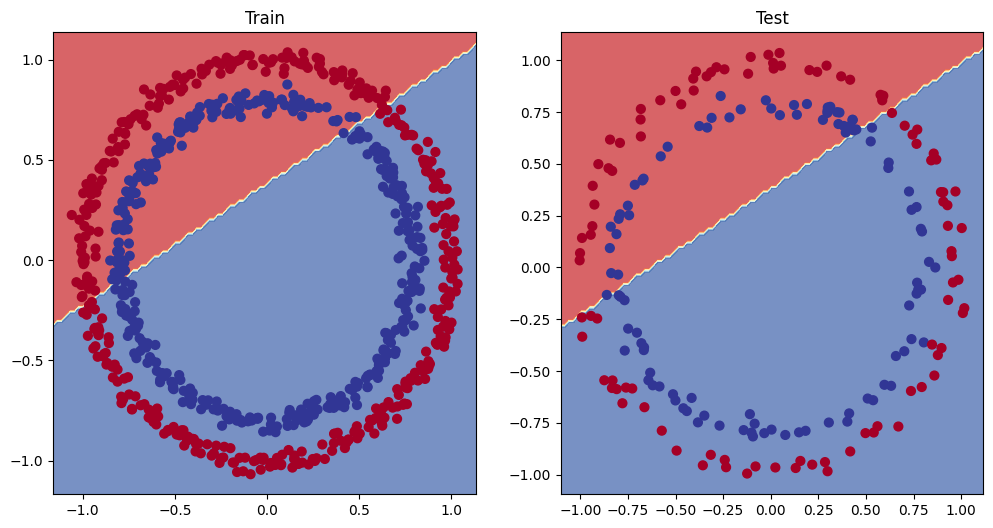

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem

In [57]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Chec the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [60]:
# Create train and test splits

train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_test_regression), len(y_test_regression), len(X_train_regression), len(y_train_regression)

(20, 20, 80, 80)

In [61]:
# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

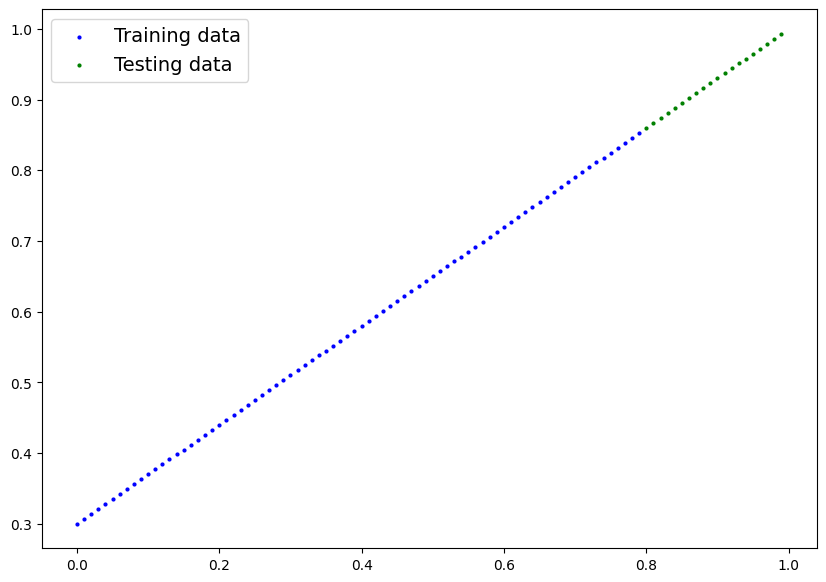

In [62]:
plot_predictions(
    train_data = X_train_regression,
    train_labels = y_train_regression,
    test_data = X_test_regression,
    test_labels = y_test_regression
)

### 5.2 Adjusting `model_1` to fit a straight line

In [64]:
# Same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [71]:
# Loss and optimizer

loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=00.1)

In [78]:
# Train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression,y_train_regression=X_train_regression.to(device), y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device), y_test_regression.to(device)

#Training

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)


  if epoch %100==0:
    print(f"Epoch{epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch0 | Loss: 0.05214 | Test loss: 0.00810
Epoch100 | Loss: 0.04636 | Test loss: 0.01260
Epoch200 | Loss: 0.04949 | Test loss: 0.01367
Epoch300 | Loss: 0.04452 | Test loss: 0.03151
Epoch400 | Loss: 0.04042 | Test loss: 0.02141
Epoch500 | Loss: 0.04334 | Test loss: 0.03943
Epoch600 | Loss: 0.04680 | Test loss: 0.05306
Epoch700 | Loss: 0.06848 | Test loss: 0.02155
Epoch800 | Loss: 0.07218 | Test loss: 0.00508
Epoch900 | Loss: 0.03543 | Test loss: 0.03476


In [73]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6784],
                      [ 0.9195],
                      [-0.5042],
                      [ 1.1480],
                      [-0.4180],
                      [ 0.3223],
                      [-0.7530],
                      [ 0.7477],
                      [ 1.2109],
                      [-0.9090]])),
             ('0.bias',
              tensor([ 0.4043, -0.0646,  0.5745, -0.1280,  0.4037, -0.1680,  0.6785, -0.0944,
                      -0.5463,  0.3131])),
             ('1.weight',
              tensor([[ 0.0187,  0.1217, -0.1429,  0.3629, -0.2658, -0.1208, -0.1561, -0.0972,
                        0.1637, -0.4420],
                      [ 0.2752, -0.2229,  0.1768,  0.0975, -0.1539,  0.2138, -0.0468,  0.2756,
                        0.1308, -0.1765],
                      [-0.0225, -0.1234,  0.0605,  0.2434,  0.1370, -0.1272,  0.1086,  0.0272,
                        0.1894, -0.2032],
                      [-0.0769,  0.0575, -0

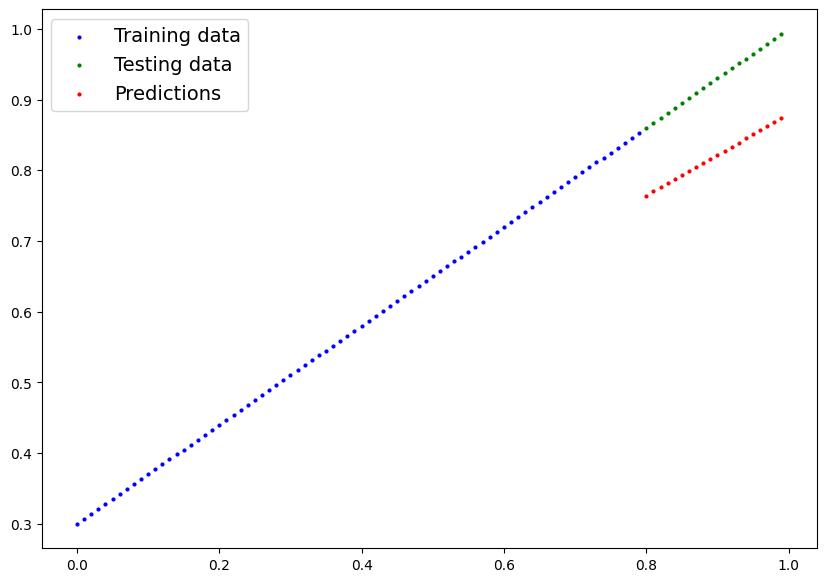

In [79]:
# Turn on evaluation mode

model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(
    train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data = X_test_regression,
    test_labels=y_test_regression,
    predictions=y_preds
)

## 6. The missing piece: non-linearlity

"what patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

or in ML terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

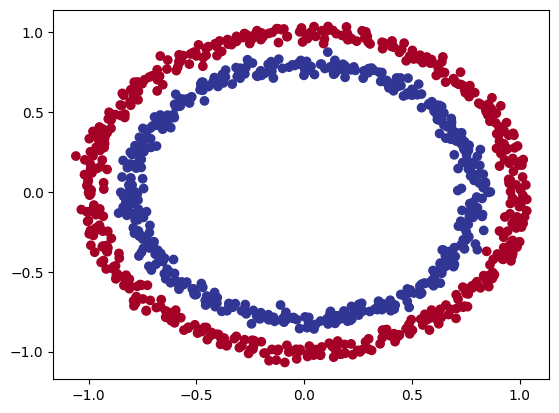

In [102]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y= make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    cmap=plt.cm.RdYlBu
)

In [84]:
import torch

from sklearn.model_selection import train_test_split

In [103]:
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)

X=torch.tensor(X).type(torch.float)
y=torch.tensor(y).type(torch.float)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 6.2 Building a model with non-linearity

In [87]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [88]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [107]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [110]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
epoch_count = []
train_loss_vals = []
test_loss_vals = []

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  pred_probs = torch.sigmoid(y_logits)
  pred_labels = torch.round(pred_probs)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(
      y_true=y_train,
      y_preds = pred_labels
  )

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    y_logits_test = model_3(X_test).squeeze()
    pred_probs_test = torch.sigmoid(y_logits_test)
    pred_labels_test = torch.round(pred_probs_test)

    tst_loss = loss_fn(y_logits_test, y_test)
    tst_acc = accuracy_fn(
      y_true=y_test,
      y_preds = pred_labels_test
    )

    if epoch %100==0:
      epoch_count.append(epoch)
      train_loss_vals.append(loss)
      test_loss_vals.append(tst_loss)

      print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {tst_loss:.5f} | Train acc: {acc:.2f}% | Test acc: {tst_acc:.2f}%")






Epoch: 0 | Train Loss: 0.56818 | Test Loss: 0.57378 | Train acc: 87.75% | Test acc: 86.50%
Epoch: 100 | Train Loss: 0.48153 | Test Loss: 0.49935 | Train acc: 93.50% | Test acc: 90.50%
Epoch: 200 | Train Loss: 0.37056 | Test Loss: 0.40595 | Train acc: 97.75% | Test acc: 92.00%
Epoch: 300 | Train Loss: 0.25458 | Test Loss: 0.30333 | Train acc: 99.00% | Test acc: 96.50%
Epoch: 400 | Train Loss: 0.17180 | Test Loss: 0.22108 | Train acc: 99.50% | Test acc: 97.50%
Epoch: 500 | Train Loss: 0.12188 | Test Loss: 0.16512 | Train acc: 99.62% | Test acc: 99.00%
Epoch: 600 | Train Loss: 0.09123 | Test Loss: 0.12741 | Train acc: 99.88% | Test acc: 99.50%
Epoch: 700 | Train Loss: 0.07100 | Test Loss: 0.10319 | Train acc: 99.88% | Test acc: 99.50%
Epoch: 800 | Train Loss: 0.05773 | Test Loss: 0.08672 | Train acc: 99.88% | Test acc: 99.50%
Epoch: 900 | Train Loss: 0.04853 | Test Loss: 0.07474 | Train acc: 99.88% | Test acc: 99.50%


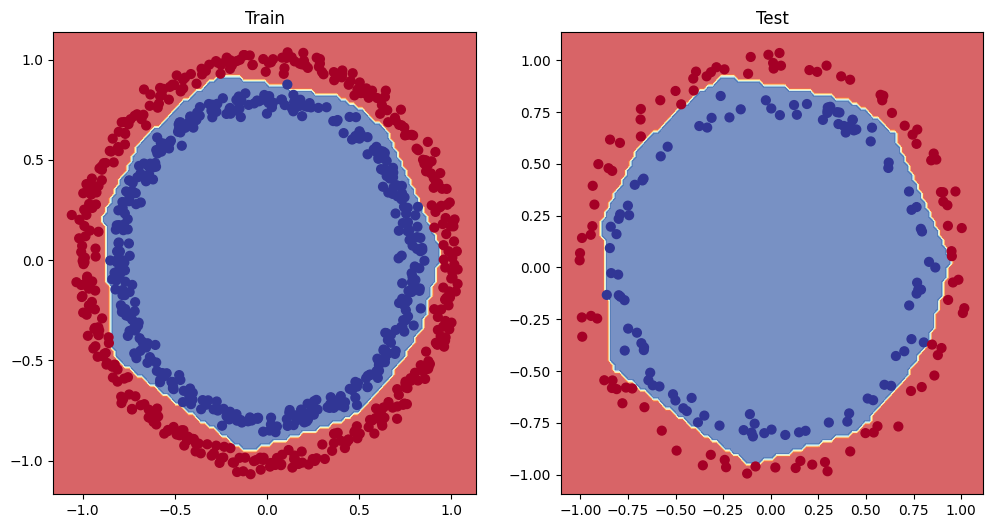

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rathe than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions

In [114]:
# Create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

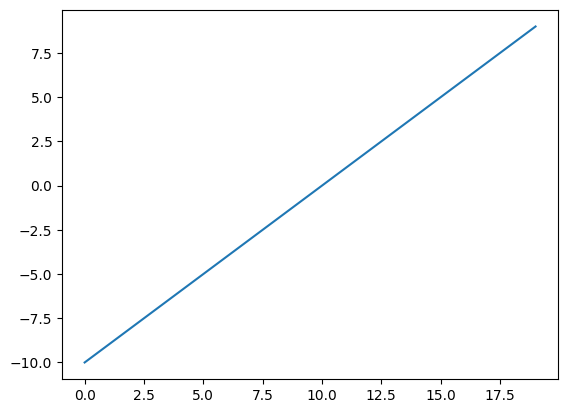

In [116]:
# Visualize the tensor

plt.plot(A)
plt.show()

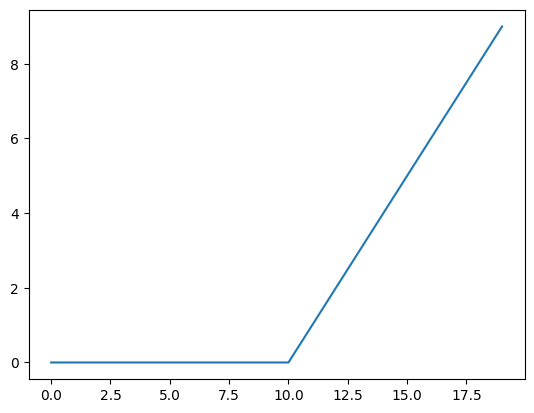

In [118]:
plt.plot(torch.relu(A))

In [120]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

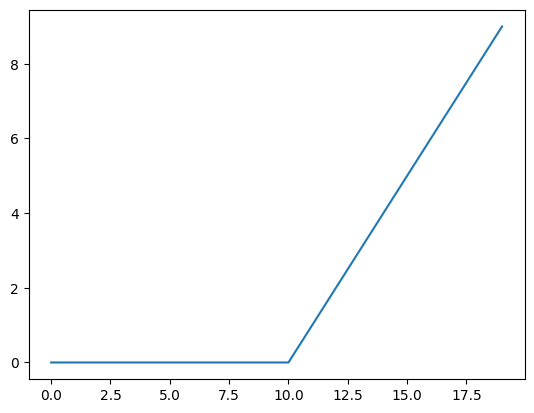

In [121]:
# plot ReLU activation function

plt.plot(relu(A))

In [125]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

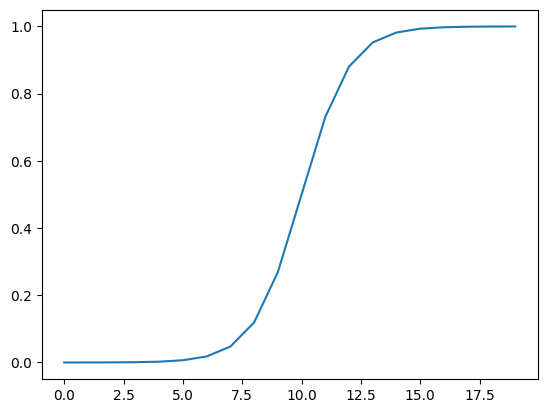

In [124]:
plt.plot(torch.sigmoid(A))
plt.show()

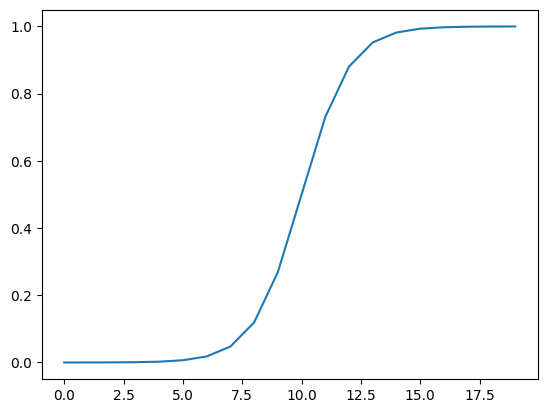

In [126]:
plt.plot(sigmoid(A))